In [1]:
from IPython.display import HTML, display
css_file_path = "../../design/custom.css"
styles = "<link rel='stylesheet' href='%s'>" % css_file_path
display(HTML(styles))

# 3.2 $\quad$ Conceptos iniciales de optimización

### Conceptos

<font color="red">CHRIS: He modificado un poco esto. Discutir qué son variables vs parámetros</font>

Nuestro objetivo es **mimimizar/maximizar $f_0(x, w)$** sujeto a $f_i(x, w) \leq b_i$,   $\qquad i= 1,...,m$

donde:

- $x = (x_1, x_2,..., x_n)$ son las variables

- $w = (w_1, w_2,..., w_n)$ son los parámetros

- $f_0: \mathbb{R}^n \rightarrow \mathbb{R}$  es la función objetivo

- $f_i: \mathbb{R}^n \rightarrow \mathbb{R}$ son las restricciones

<font color="red">CHRIS: ¿Qué es $b_i$? Entiendo que es el valor de la restricción para no superarlo?</font>

**Solución**: $w^*$ es el vector, de entre todos los vectores que cumplen las restricciones, que hace que $f_0(x, w^*)$ tenga el valor mínimo/máximo.

---

**EJEMPLO: OPTIMIZACIÓN DE UNA CARTERA**

- *variables:*     retornos esperados de cada activo
- *parámetros:*    cantidades o pesos que invierto en cada activo
- *restricciones:* presupuesto total, max/min cantidad invertida en un activo, retorno mínimo de la cartera
- *objetivo:*      riesgo o volatilidad

**EJEMPLO: MACHINE LEARNING**

- *variables:*     datos de entrada
- *parámetros:*    parámetros del modelo (ejemplo: conexiones entre neuronas de una red neuronal)
- *restricciones:* límites de los parámetros (ejemplo: las respuestas neuronales solo pueden ser positivas)
- *objetivo:*      función de error de la predicción de tu modelo frente al valor esperado

Hay muchos tipos de problemas de optimización. La optimización de una cartera, o el Machine Learning no son más que dos ejemplos. Igualmente, este tipo de problemas pueden ser muy difíciles de resolver por varias razones:

- No se puede plantear el problema de forma apropiada

- No podemos encontrar la solución en un tiempo razonable

- Requiere muchos recursos de computación

**Excepciones**: algunos problemas se puden resolver de manera eficaz y fiable:

- Problemas lineales con mínimos cuadrados

- Optimización convexa

<font color="red">CHRIS: A partir de aquí, revisar bien la nomenclatura</font>

## 1. Problemas lineales con mínimos cuadrados

Este método se utiliza principalmente para problemas de ajuste de modelos, especialmente en estadística y análisis de datos. El objetivo es minimizar la suma de los cuadrados de las diferencias (errores) entre los valores observados y los valores predichos por un modelo. Es ampliamente utilizado en regresión lineal para estimar los coeficientes de un modelo lineal.

$$\underset{w}{\min} \|Xw - y\|_2^2$$

donde $X$ es la matriz de diseño, que contiene las características de entrada de tus datos. Cada fila $x_i$ corresponde a una observación, y cada columna a una variable independiente. Por otro lado, $y$ es el vector de valores objetivo de tus datos (variable dependiente o target). Es el valor que se espera que tu modelo prediga.

Existe una solución analítica:

$w^* = (X^TX)^{-1} X^T y$

Para realizar regresiones lineales en python existen varias librerías:

- polyfit de Numpy

- linregress de Scipy

- **OLS de Statsmodel**

- LinearRegression de scikit-learn



---

### Ejemplo: CAPM

Un ejemplo clásico de optimización mediante mínimos cuadrados en finanzas es la regresión lineal para estimar el modelo de valoración de activos de capital (CAPM, por sus siglas en inglés). Aunque este modelo se verá en profundidad en el próximo tema, ahora nos debemos quedar con la idea de la optimización.

El CAPM es un modelo utilizado para determinar la rentabilidad esperada de un activo, tomando en cuenta el riesgo y el tiempo valor del dinero. El modelo establece que la rentabilidad de un activo es una función lineal del rendimiento de un mercado más amplio.

<div style="text-align: center;">
<img src="../imgs/capm.png" alt="CAPM" width="500"/>
</div>

<font color="red">Yo quitaría toda la explicación y mostraría solo el código para adelantarles el concepto sin entrar en detalles. Lo vemos mañana.</font>




**El Modelo CAPM**: 
La ecuación del CAPM es:

$$ R_i = \alpha + \beta R_m $$

Donde:
- $ R_i $ es el rendimiento del activo individual.
- $ \alpha $ es el intercepto, que representa la rentabilidad esperada del activo cuando el rendimiento del mercado es cero.
- $ \beta $ es la pendiente, que mide la sensibilidad del rendimiento del activo a los cambios en el rendimiento del mercado.
- $ R_m $ es el rendimiento del mercado.

**Aplicación de Mínimos Cuadrados**:
Para estimar $ \alpha $ y $ \beta $, se utiliza el método de mínimos cuadrados. Esto implica ajustar una línea recta a un conjunto de datos históricos de rendimientos del activo ($ R_i $) y rendimientos del mercado ($ R_m $) de la siguiente manera:

1. **Recolección de Datos**: Recolecta datos históricos de rendimientos para el activo y el mercado correspondiente.
2. **Ajuste de la Línea**: Utiliza mínimos cuadrados para encontrar los valores de $ \alpha $ y $ \beta $ que minimizan la suma de los cuadrados de las diferencias entre los rendimientos observados del activo y los rendimientos predichos por el modelo CAPM para cada punto de datos.
3. **Interpretación**:
   - **$ \alpha $**: Si es significativamente diferente de cero, podría indicar que el activo tiene un rendimiento anormalmente alto o bajo en comparación con lo esperado por el riesgo de mercado.
   - **$ \beta $**: Un valor mayor que 1 indica que el activo es más volátil que el mercado, mientras que un valor menor que 1 indica que es menos volátil.

Este modelo es fundamental en finanzas, tanto para la gestión de riesgos como para la toma de decisiones de inversión, ya que proporciona una medida del riesgo sistemático de un activo y su relación con el mercado en general.


In [11]:
import numpy as np
import pandas as pandas
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [12]:
tickers=['META', '^IXIC']
precios_df = yf.download(tickers, start='2018-01-01', end='2023-11-30', period='M')['Adj Close']
retornos_df = np.log(precios_df).diff().dropna()

[*********************100%%**********************]  2 of 2 completed


In [17]:
# split dependent and independent variable
X = retornos_df['^IXIC']
y = retornos_df['META']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
results = model.fit()

alpha = results.params.iloc[0]
beta = results.params.iloc[1]
print(f'La beta es: {beta:.2f}')

La beta es: 1.23


Comprobamos si coincide con la beta que nos da yahoo finance:


<img src="../imgs/beta-meta.png" alt="CAPM" width="700"/>


Con la siguiente figura, vamos a comprobar si el modelo se está adaptando correctamente a los datos. Vamos a pintar el comportamiento de `META` frente al mercado, representado por el Nasdaq Composite Index (^IXIC). En la figura vemos cómo nuestro modelo lineal (curva naranja), que intenta estudiar el rendimiento del activo $R_i$, se adapta lo mejor posible a los datos (puntos azules), que representan el mercado $R_m$.

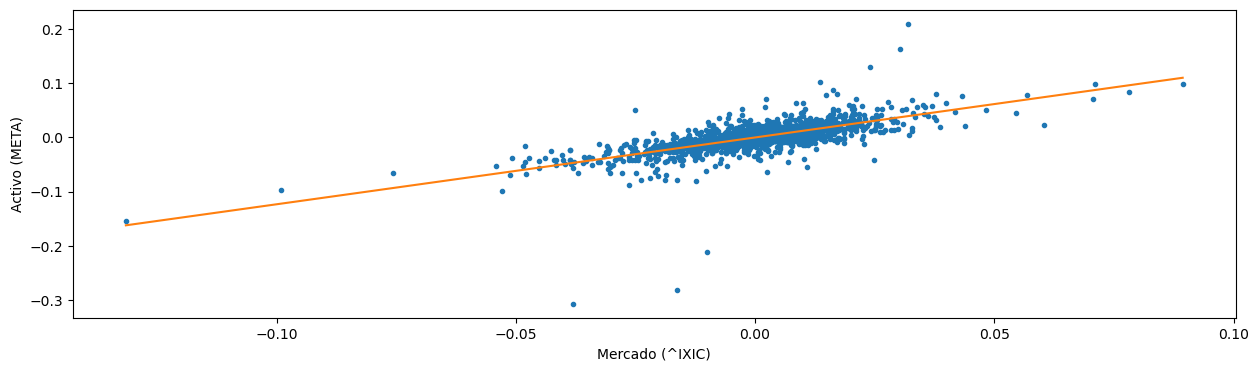

In [36]:
plt.figure(figsize=(15, 4))
plt.plot(X, y, '.')
plt.plot([X.min(), X.max()], [alpha + beta*X.min(), alpha + beta*X.max()])
plt.xlabel("Mercado (^IXIC)")
plt.ylabel("Activo (META)")
plt.show()

## 2. Optimización Convexa

<div style="text-align: center;">
    <img src="../imgs/no-convexo.PNG" alt="Primera Imagen" width="350" height="250" style="float: left; margin-right: 10px; border: 2px solid black;" />
    <img src="../imgs/convexo.PNG" alt="Segunda Imagen" width="350" height="250" style="float: left; margin-right: 10px; border: 2px solid black;" />
</div>

La optimización convexa es un subcampo de la optimización matemática que estudia cómo minimizar o maximizar una función convexa sobre un conjunto convexo. La optimización convexa incluye los problemas lineales.

<img src="../imgs/convexa.jpg" alt="CAPM" width="400"/>

Las ventajas de los problemas de optimización convexa incluyen:

- **Solución Óptima Global**: Cualquier mínimo local es también un mínimo global, lo que asegura que la solución encontrada es la mejor posible.

- **Eficiencia Computacional**: Los algoritmos para resolver problemas convexos son generalmente eficientes y bien entendidos, lo que permite soluciones rápidas y confiables.

- **Análisis Teórico Sólido**: La teoría subyacente es bien desarrollada, proporcionando una comprensión clara de las propiedades del problema y las soluciones.

- **Amplia Aplicabilidad**: Los problemas de optimización convexa son relevantes en muchos campos, como la economía, la ingeniería, el machine learning y la investigación operativa.

- **Existencia de Soluciones**: En muchos casos, se puede garantizar la existencia de una solución.

- **Simplicidad de Implementación**: Los algoritmos para resolver problemas convexos son más sencillos de implementar en comparación con problemas de optimización no convexa.

- **Robustez**: Los problemas convexos son menos sensibles a pequeñas variaciones en los datos, lo que los hace robustos en aplicaciones prácticas.


Los **PROBLEMAS DE OPTIMIZACIÓN DE CARTERAS DE ACTIVOS FINANCIEROS SON PROBLEMAS DE OPTIMIZACIÓN CONVEXA**:

1. **Función Objetivo Convexa**:
   - En la optimización de carteras, como en el modelo de Markowitz, la función objetivo suele ser minimizar el riesgo (varianza o desviación estándar) o maximizar el rendimiento esperado.
   - La varianza (riesgo) es una función cuadrática de los pesos de los activos, naturalmente convexa

2. **Restricciones Convexas**:
    - Las restricciones comunes, como la suma de los pesos igual a 1 y las restricciones de no-negatividad, son lineales (afines)
    - Estas restricciones son convexas, lo que significa que el conjunto de soluciones posibles (el espacio factible) es un conjunto convexo.

Para más información sobre optimización convexa podéis estudiar el curso de Stanford [Convex Optimization](https://www.youtube.com/playlist?list=PL3940DD956CDF0622)